# Run the whole deltas algorithm

In [51]:
%load_ext autoreload
%autoreload 2

import numpy as np
import deltas.pipeline.run as run
import deltas.model_deltas as model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [52]:
N1 = 10000
N2 = 10
data_clf = run.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


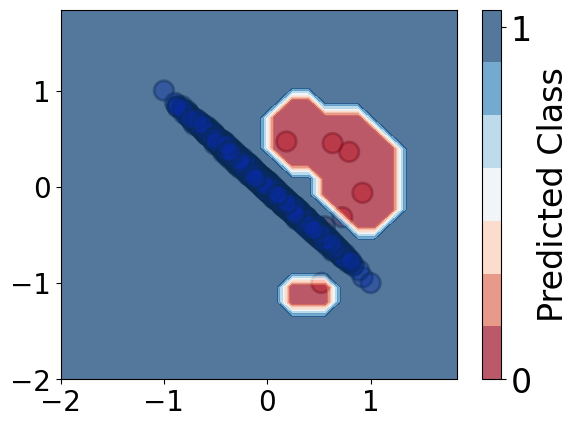

SMOTE


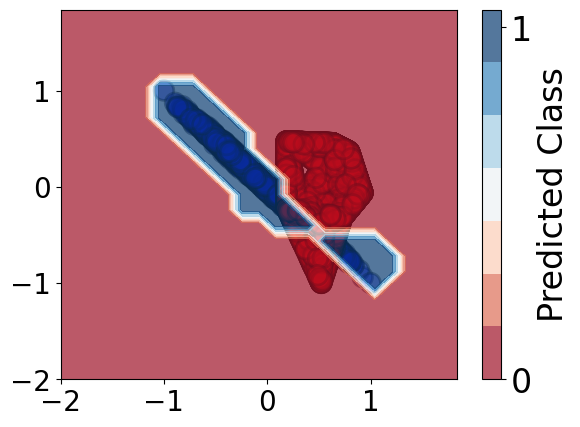

In [53]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [54]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[0.04641891]])

## Fit deltas

In [55]:
X = data_clf['data']['X']
y = data_clf['data']['y']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = model_deltas.downsample_deltas(
    clf,
    ).fit(X, y, _print=True, _plot=True)

Trying random downsampling deltas:   0%|          | 0/1000 [00:00<?, ?it/s]

found downsampled solution with removing 599 number of points


## Plot training data information

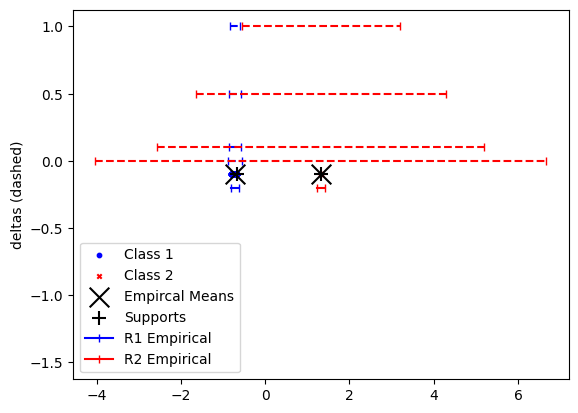

In [56]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [57]:
deltas_model.print_params()

Parameters
                R:  1.3233843306167798
                N1: 9409
                N2: 2
                R1: 0.09524148403538524
                R2: 0.0
                M:  1.9967251149053302
                D:  2.037208039846429
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.74265
SMOTE accuracy: 0.90705
deltas accuracy: 0.9284

original F1: 0.6534706793240422
SMOTE F1: 0.9041604371810075
deltas F1: 0.9228780697975011

original precision0: 0.6601967386281111
SMOTE precision0: 0.8839007827973215
deltas precision0: 0.8747375787263821

original precision1: 1.0
SMOTE precision1: 0.9331701606895818
deltas precision1: 1.0



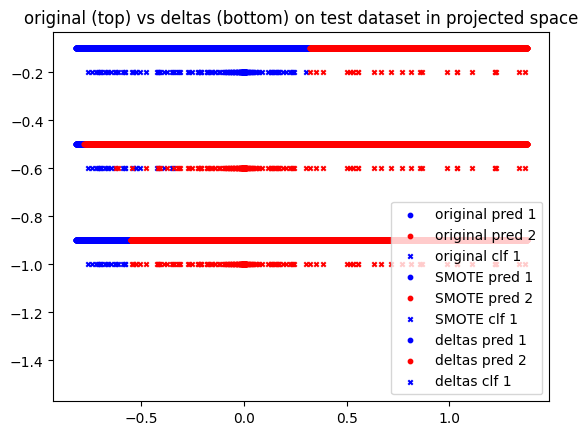

original


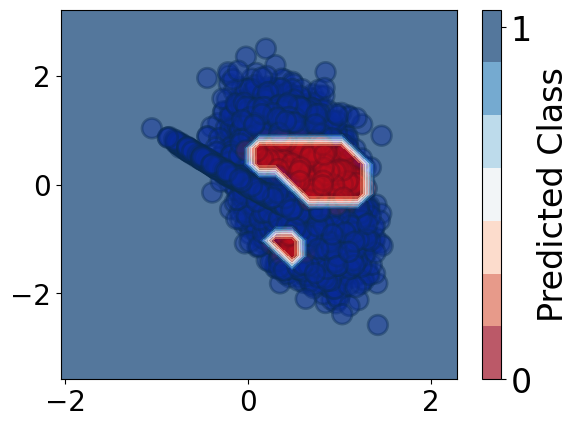

SMOTE


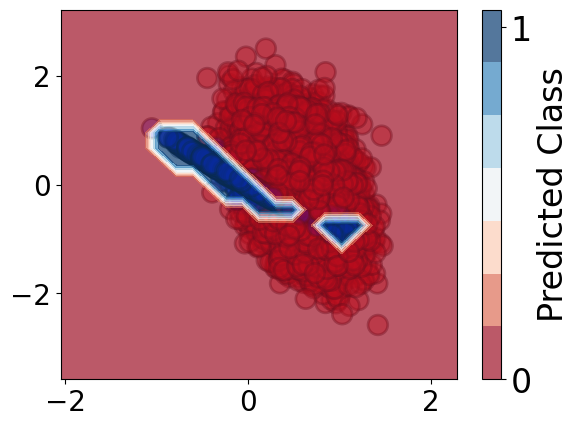

deltas


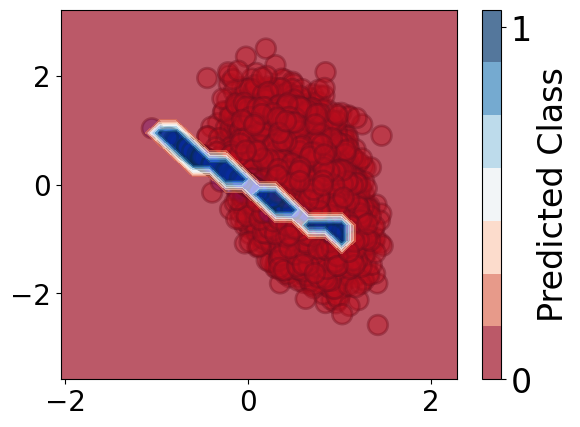

In [58]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)